In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.style.use("fivethirtyeight")

path = ""

In [2]:
# Uncomment cell if using Google Colab

from google.colab import drive
drive.mount("/content/drive")

path = "/content/drive/My Drive/csc-461-final-project/"

Mounted at /content/drive


In [3]:
Statewide = pd.read_csv(path + "data/Statewide.csv")
Statewide.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8,TGT STATEWIDE PRIMARY,TGT PARTY AFFILIATION
0,6,2921,1,1962,1,1,1,0,1,1,3,0,2,0,0
1,6,2920,2,1984,0,1,0,0,0,0,0,0,0,0,0
2,32,2878,3,1968,1,1,0,1,1,1,0,3,3,1,3
3,32,2878,3,1962,1,1,0,1,1,0,0,3,0,1,3
4,34,2889,3,1996,0,1,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

In [5]:
Statewide_target = Statewide["TGT STATEWIDE PRIMARY"]
Statewide = Statewide.drop(["TGT STATEWIDE PRIMARY", "TGT PARTY AFFILIATION"], axis = 1)

In [6]:
Statewide.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8
0,6,2921,1,1962,1,1,1,0,1,1,3,0,2
1,6,2920,2,1984,0,1,0,0,0,0,0,0,0
2,32,2878,3,1968,1,1,0,1,1,1,0,3,3
3,32,2878,3,1962,1,1,0,1,1,0,0,3,0
4,34,2889,3,1996,0,1,0,0,0,0,0,0,0


In [7]:
Statewide_target.head()

0    0
1    0
2    1
3    1
4    0
Name: TGT STATEWIDE PRIMARY, dtype: int64

In [ ]:
%pip install wandb

In [ ]:
import wandb
wandb.login()

### Baseline models

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Statewide, Statewide_target, test_size = .50, stratify = Statewide_target)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

from sklearn.dummy import DummyClassifier

Train features shape: (408148, 13)
Test features shape: (408149, 13)


#### Random Methods

##### Uniform

In [11]:
params = {"strategy": "uniform"}
wandb.init(config=params)

wandb: Currently logged in as: rodrigopimentel (gotv-ml). Use `wandb login --relogin` to force relogin


In [12]:
uniformClassifier = DummyClassifier(**params)
uniformClassifier.fit(X_train, y_train)
test_pred = uniformClassifier.predict(X_test)
test_proba = uniformClassifier.predict_proba(X_test)
test_accuracy = roc_auc_score(y_test, uniformClassifier.predict_proba(X_test)[:,1])

print("AUC-ROC: {}".format(test_accuracy))
print("AUC-PR {}".format(sklearn.metrics.average_precision_score(y_test, uniformClassifier.predict_proba(X_test)[:,1])))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

print('\nF1 Score: {}'.format(
    f1_score(y_test, test_pred, average = "weighted")))
print('Precision: {}'.format(
    precision_score(y_test, test_pred, average = "weighted")))
print('Recall: {}'.format(
    recall_score(y_test, test_pred, average = "weighted")))
print('Accuracy: {}'.format(
    accuracy_score(y_test, test_pred)))
print('MCC: {}'.format(
    matthews_corrcoef(y_test, test_pred)))

AUC-ROC: 0.5
AUC-PR 0.16854874077849022

F1 Score: 0.5616572593885437
Precision: 0.719752472014889
Recall: 0.4999473231589444
Accuracy: 0.4999473231589444
MCC: 8.706218171411816e-05


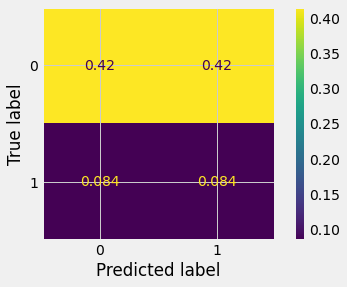

In [13]:
cm = confusion_matrix(y_test, test_pred, normalize = "all", labels=uniformClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = uniformClassifier.classes_)
wandb.sklearn.plot_confusion_matrix(y_test, test_pred, ["didn't vote", "voted"]) 
disp.plot()
plt.show()

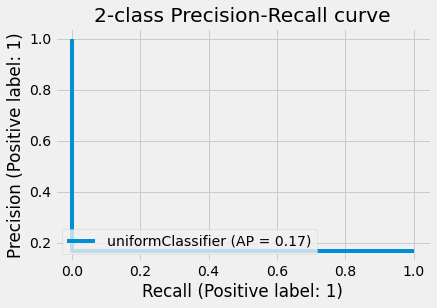

In [14]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    uniformClassifier, X_test, y_test, name="uniformClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [15]:

wandb.sklearn.plot_classifier(uniformClassifier, X_train, X_test, y_train, y_test, test_pred, test_proba, ["didn't vote", "voted"], model_name='uniformClassifier', feature_names = X_train.columns)

wandb: 
wandb: Plotting uniformClassifier.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


##### Stratified

In [16]:
params = {"strategy": "stratified"}
wandb.init(config=params)

In [17]:
stratifiedClassifier = DummyClassifier(**params)
stratifiedClassifier.fit(X_train, y_train)
test_pred = stratifiedClassifier.predict(X_test)
test_proba = stratifiedClassifier.predict_proba(X_test)
test_accuracy = roc_auc_score(y_test, stratifiedClassifier.predict_proba(X_test)[:,1])

print("AUC-ROC: {}".format(test_accuracy))
print("AUC-PR {}".format(sklearn.metrics.average_precision_score(y_test, stratifiedClassifier.predict_proba(X_test)[:,1])))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

print('\nF1 Score: {}'.format(
    f1_score(y_test, test_pred, average = "weighted")))
print('Precision: {}'.format(
    precision_score(y_test, test_pred, average = "weighted")))
print('Recall: {}'.format(
    recall_score(y_test, test_pred, average = "weighted")))
print('Accuracy: {}'.format(
    accuracy_score(y_test, test_pred)))
print('MCC: {}'.format(
    matthews_corrcoef(y_test, test_pred)))

AUC-ROC: 0.49917165143892167
AUC-PR 0.16873730156396302

F1 Score: 0.7199804530136453
Precision: 0.7198466017245921
Recall: 0.7201144680006566
Accuracy: 0.7201144680006566
MCC: 0.00045214448664090116


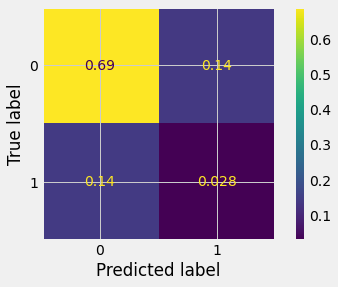

In [18]:
cm = confusion_matrix(y_test, test_pred, normalize = "all", labels=stratifiedClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = stratifiedClassifier.classes_)
wandb.sklearn.plot_confusion_matrix(y_test, test_pred, ["didn't vote", "voted"]) 
disp.plot()
plt.show()

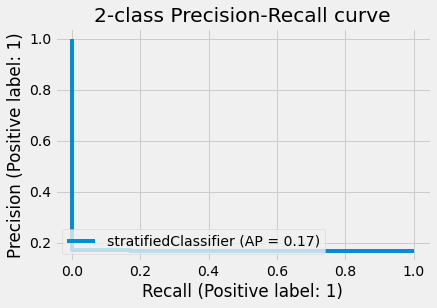

In [42]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    stratifiedClassifier, X_test, y_test, name="stratifiedClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [20]:

wandb.sklearn.plot_classifier(stratifiedClassifier, X_train, X_test, y_train, y_test, test_pred, test_proba, ["didn't vote", "voted"], model_name='stratifiedClassifier', feature_names = X_train.columns)

wandb: 
wandb: Plotting stratifiedClassifier.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


#### Constant Methods

##### Constant (non-voting)

In [21]:
params = {"strategy": "constant", "constant": 0}
wandb.init(config=params)

In [22]:
constantClassifier = DummyClassifier(**params)
constantClassifier.fit(X_train, y_train)
test_pred = constantClassifier.predict(X_test)
test_proba = constantClassifier.predict_proba(X_test)
test_accuracy = roc_auc_score(y_test, constantClassifier.predict_proba(X_test)[:,1])

print("AUC-ROC: {}".format(test_accuracy))
print("AUC-PR {}".format(sklearn.metrics.average_precision_score(y_test, constantClassifier.predict_proba(X_test)[:,1])))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

print('\nF1 Score: {}'.format(
    f1_score(y_test, test_pred, average = "weighted")))
print('Precision: {}'.format(
    precision_score(y_test, test_pred, average = "weighted", zero_division = 0)))
print('Recall: {}'.format(
    recall_score(y_test, test_pred, average = "weighted")))
print('Accuracy: {}'.format(
    accuracy_score(y_test, test_pred)))
print('MCC: {}'.format(
    matthews_corrcoef(y_test, test_pred)))

AUC-ROC: 0.5
AUC-PR 0.16854874077849022

F1 Score: 0.7549326720874768
Precision: 0.6913111964610342
Recall: 0.8314512592215098
Accuracy: 0.8314512592215098
MCC: 0.0


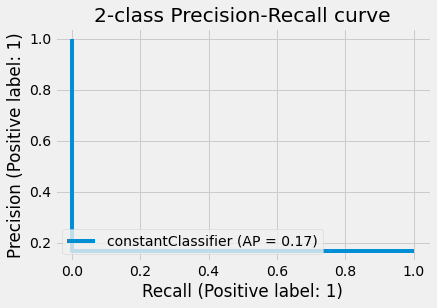

In [23]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    constantClassifier, X_test, y_test, name="constantClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

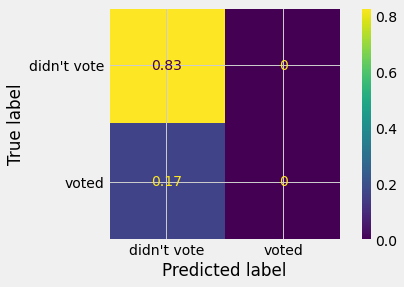

In [24]:
cm = confusion_matrix(y_test, test_pred, normalize = "all", labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["didn't vote", "voted"])
wandb.sklearn.plot_confusion_matrix(y_test, test_pred, ["didn't vote", "voted"]) 
disp.plot()
plt.show()

In [25]:

wandb.sklearn.plot_classifier(constantClassifier, X_train, X_test, y_train, y_test, test_pred, test_proba, ["didn't vote", "voted"], model_name='constantClassifier', feature_names = X_train.columns)

wandb: 
wandb: Plotting constantClassifier.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


##### Constant (voting)

In [26]:
params = {"strategy": "constant", "constant": 1}
wandb.init(config=params)

In [27]:
constantClassifier = DummyClassifier(**params)
constantClassifier.fit(X_train, y_train)
test_pred = constantClassifier.predict(X_test)
test_proba = constantClassifier.predict_proba(X_test)
test_accuracy = roc_auc_score(y_test, constantClassifier.predict_proba(X_test)[:,1])

print("AUC-ROC: {}".format(test_accuracy))
print("AUC-PR {}".format(sklearn.metrics.average_precision_score(y_test, constantClassifier.predict_proba(X_test)[:,1])))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

print('\nF1 Score: {}'.format(
    f1_score(y_test, test_pred, average = "weighted")))
print('Precision: {}'.format(
    precision_score(y_test, test_pred, average = "weighted")))
print('Recall: {}'.format(
    recall_score(y_test, test_pred, average = "weighted")))
print('Accuracy: {}'.format(
    accuracy_score(y_test, test_pred)))
print('MCC: {}'.format(
    matthews_corrcoef(y_test, test_pred)))

AUC-ROC: 0.5
AUC-PR 0.16854874077849022

F1 Score: 0.04862215332000402
Precision: 0.02840867801801469


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.16854874077849022
Accuracy: 0.16854874077849022
MCC: 0.0


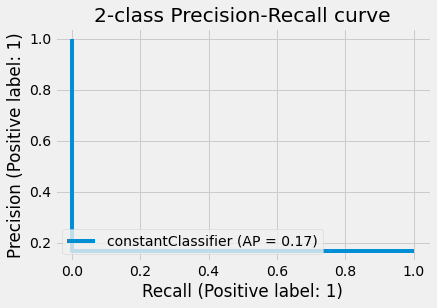

In [28]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    constantClassifier, X_test, y_test, name="constantClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

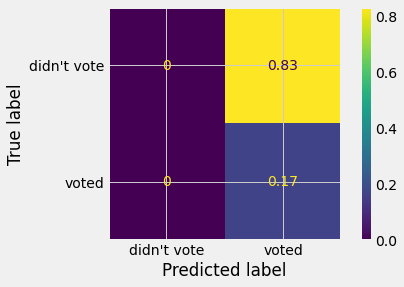

In [29]:
cm = confusion_matrix(y_test, test_pred, normalize = "all", labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["didn't vote", "voted"])
wandb.sklearn.plot_confusion_matrix(y_test, test_pred, ["didn't vote", "voted"]) 
disp.plot()
plt.show()

In [30]:

wandb.sklearn.plot_classifier(constantClassifier, X_train, X_test, y_train, y_test, test_pred, test_proba, ["didn't vote", "voted"], model_name='constantClassifier', feature_names = X_train.columns)

wandb: 
wandb: Plotting constantClassifier.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


##### Most Frequent

In [31]:
params = {"strategy": "most_frequent"}
wandb.init(config=params)

In [32]:
mostFrequentClassifier = DummyClassifier(**params)
mostFrequentClassifier.fit(X_train, y_train)
test_pred = mostFrequentClassifier.predict(X_test)
test_proba = mostFrequentClassifier.predict_proba(X_test)
test_accuracy = roc_auc_score(y_test, mostFrequentClassifier.predict_proba(X_test)[:,1])

print("AUC-ROC: {}".format(test_accuracy))
print("AUC-PR {}".format(sklearn.metrics.average_precision_score(y_test, mostFrequentClassifier.predict_proba(X_test)[:,1])))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

print('\nF1 Score: {}'.format(
    f1_score(y_test, test_pred, average = "weighted")))
print('Precision: {}'.format(
    precision_score(y_test, test_pred, average = "weighted", zero_division = 0)))
print('Recall: {}'.format(
    recall_score(y_test, test_pred, average = "weighted")))
print('Accuracy: {}'.format(
    accuracy_score(y_test, test_pred)))
print('MCC: {}'.format(
    matthews_corrcoef(y_test, test_pred)))

AUC-ROC: 0.5
AUC-PR 0.16854874077849022

F1 Score: 0.7549326720874768
Precision: 0.6913111964610342
Recall: 0.8314512592215098
Accuracy: 0.8314512592215098
MCC: 0.0


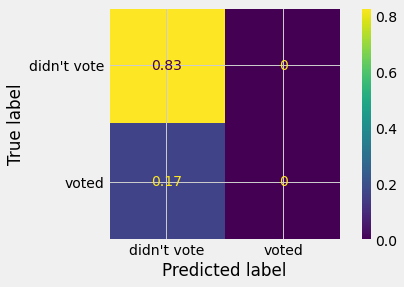

In [33]:
cm = confusion_matrix(y_test, test_pred, normalize = "all", labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["didn't vote", "voted"])
wandb.sklearn.plot_confusion_matrix(y_test, test_pred, ["didn't vote", "voted"]) 
disp.plot()
plt.show()

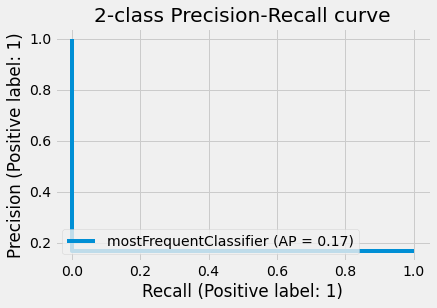

In [34]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    mostFrequentClassifier, X_test, y_test, name="mostFrequentClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [35]:

wandb.sklearn.plot_classifier(mostFrequentClassifier, X_train, X_test, y_train, y_test, test_pred, test_proba, ["didn't vote", "voted"], model_name='mostFrequentClassifier', feature_names = X_train.columns)

wandb: 
wandb: Plotting mostFrequentClassifier.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


##### Prior

In [36]:
params = {"strategy": "prior"}
wandb.init(config=params)

In [37]:
priorClassifier = DummyClassifier(**params)
priorClassifier.fit(X_train, y_train)
test_pred = priorClassifier.predict(X_test)
test_proba = priorClassifier.predict_proba(X_test)
test_accuracy = roc_auc_score(y_test, mostFrequentClassifier.predict_proba(X_test)[:,1])

print("AUC-ROC: {}".format(test_accuracy))
print("AUC-PR {}".format(sklearn.metrics.average_precision_score(y_test, mostFrequentClassifier.predict_proba(X_test)[:,1])))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

print('\nF1 Score: {}'.format(
    f1_score(y_test, test_pred, average = "weighted")))
print('Precision: {}'.format(
    precision_score(y_test, test_pred, average = "weighted")))
print('Recall: {}'.format(
    recall_score(y_test, test_pred, average = "weighted")))
print('Accuracy: {}'.format(
    accuracy_score(y_test, test_pred)))
print('MCC: {}'.format(
    matthews_corrcoef(y_test, test_pred)))

AUC-ROC: 0.5
AUC-PR 0.16854874077849022

F1 Score: 0.7549326720874768
Precision: 0.6913111964610342


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.8314512592215098
Accuracy: 0.8314512592215098
MCC: 0.0


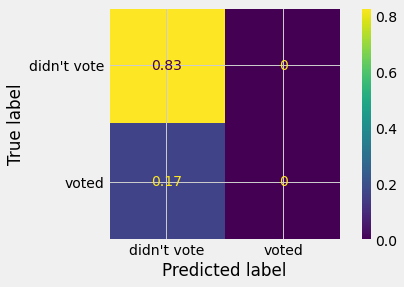

In [38]:
cm = confusion_matrix(y_test, test_pred, normalize = "all", labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["didn't vote", "voted"])
wandb.sklearn.plot_confusion_matrix(y_test, test_pred, ["didn't vote", "voted"]) 
disp.plot()
plt.show()

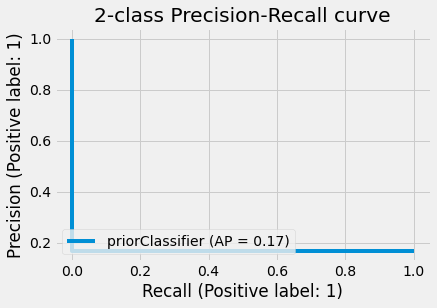

In [39]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    priorClassifier, X_test, y_test, name="priorClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [40]:

wandb.sklearn.plot_classifier(priorClassifier, X_train, X_test, y_train, y_test, test_pred, test_proba, ["didn't vote", "voted"], model_name='priorClassifier', feature_names = X_train.columns)

wandb: 
wandb: Plotting priorClassifier.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


In [41]:
wandb.finish()